# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA
import matplotlib.pyplot as plt
from statsmodels.tools import eval_measures
from scipy.fftpack import fft
from scipy import signal


# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [4]:
sensor.isnull().sum()

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [5]:
sensor.shape

(1751, 12)

In [6]:
29*60

1740

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [7]:
time_series = pd.date_range(start="2018-01-01 00:00:00",
                            end="2018-01-01 00:29:10",
                            periods=1751)

time_series

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq=None)

Assign the time series index to the dataframe's index.

In [8]:
datetime_idx = pd.DatetimeIndex(time_series, freq='infer')
sensor.index= datetime_idx
sensor.head(3)

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

'hola'

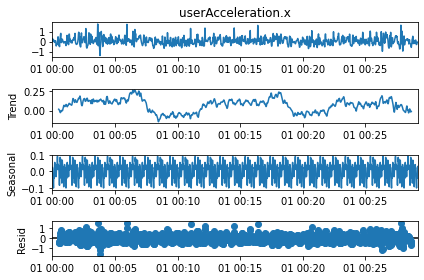

In [9]:
res = sm.tsa.seasonal_decompose(sensor['userAcceleration.x'], period=60)
res.plot()
'hola'

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

'hola'

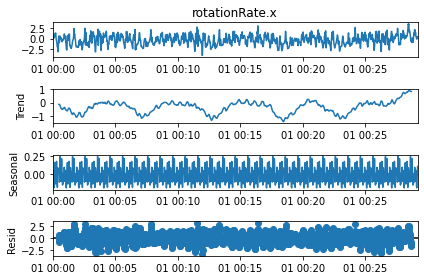

In [10]:
res = sm.tsa.seasonal_decompose(sensor['rotationRate.x'], period=60)
res.plot()
'hola'

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

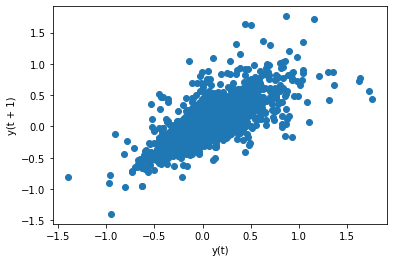

In [11]:
pd.plotting.lag_plot(sensor['userAcceleration.x'])

Create a lag plot for `rotationRate.x`

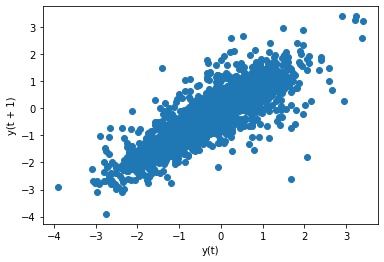

In [12]:
pd.plotting.lag_plot(sensor['rotationRate.x'])

What are your conclusions from both visualizations?

En el caso de ambos graficos, es posible inferir que si existe una autocorrelación moderada, y que los valores evaluadoes en este time-series no son totalmente aleatorios
- https://www.itl.nist.gov/div898/handbook/eda/section3/lagplot2.htm

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [13]:
def ADF(np_series):
    adf, pvalue, usedlag, nobs, critvalues, icbest = adfuller(np_series)
    if pvalue > 0.05:
        print(f'Fail to reject the H0, with pvalue {pvalue}.The data has a UNIT ROOT and is STATIONARY')
        return adf, pvalue
    else:
        print(f"Reject the H0, with pvalue {pvalue}.\n The data DOESN'T HAVE A UNIT ROOT and is NON-STATIONARY")
        return adf, pvalue
    
ADF(sensor['userAcceleration.x'])

Reject the H0, with pvalue 2.823439483037483e-30.
 The data DOESN'T HAVE A UNIT ROOT and is NON-STATIONARY


(-17.95799408616976, 2.823439483037483e-30)

In [14]:
ADF(sensor['rotationRate.x'])

Reject the H0, with pvalue 6.3202303359124956e-06.
 The data DOESN'T HAVE A UNIT ROOT and is NON-STATIONARY


(-5.269860625086411, 6.3202303359124956e-06)

What are your conclusions from this test?

Al rechazar H0 en ambos casos, aumimos que ninguna de las dos variables estudiadas NO TIENEN UNIT ROOT. En ambos casos los datos NO SON ESTACIONARIOS, pero SI SON ESTACIONALES.


Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

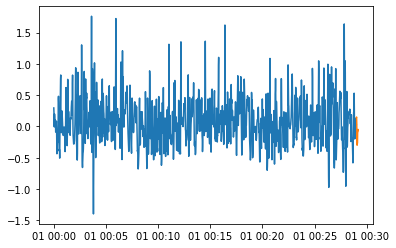

In [15]:
user_acc = sensor['userAcceleration.x']

razor = 1740
train = user_acc[:razor]
test = user_acc[razor:]

plt.plot(train)
plt.plot(test)

In [16]:
model = ARMA(train, order=(2,1))
arma_results = model.fit()
y_pred = arma_results.predict(start=len(train),
                              end=len(train)+len(test)-1, 
                              dynamic=False)

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [17]:
results = pd.DataFrame({"GT":test,
                        "pred":y_pred,
                        "diff":y_pred - test
                    })
print(f"RMSE: {eval_measures.rmse(y_pred, test.values)}")
display(results.tail())

RMSE: 0.21684037909769


,GT,pred,diff
2018-01-01 00:29:06,-0.268367,0.065376,0.333743
2018-01-01 00:29:07,-0.102444,0.064169,0.166613
2018-01-01 00:29:08,-0.085590,0.063469,0.149059
2018-01-01 00:29:09,-0.048105,0.063235,0.111340
2018-01-01 00:29:10,-0.065011,0.063269,0.128280


# BONUS
Use a LOW PASS FILTER on the `userAcceleration.x` time-series, to modify the signal and try a new ARMA Model.

### Visualize FFT
Return discrete Fourier transform of real or complex sequence.

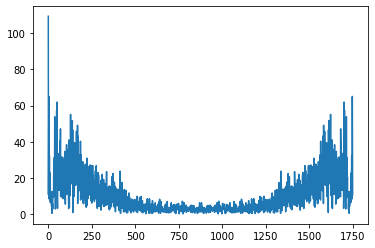

In [18]:
fft_y = np.abs(fft(user_acc.values))
plt.plot(fft_y)

In [19]:
7/(1/3600)

25200.0

In [101]:
def lowpassfilt(npseries, fm=1000, fc=10):
    b,a = signal.butter(2, fc/fm)
    clean_signal = pd.Series(signal.filtfilt(b,a, npseries.values), index=npseries.index)
    plt.title(f"Frecuencia de Corte = {fc}, Frecuencia de Medición = {fm} ")
    plt.plot(clean_signal,)

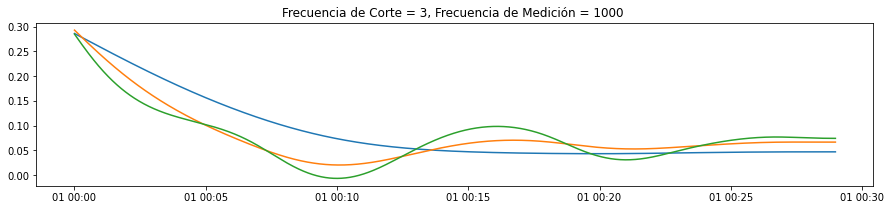

In [102]:
plt.figure(figsize=(15,3))
for i in range(1,4,1):
    lowpassfilt(train, fc=i)    

# This one looks 3-D

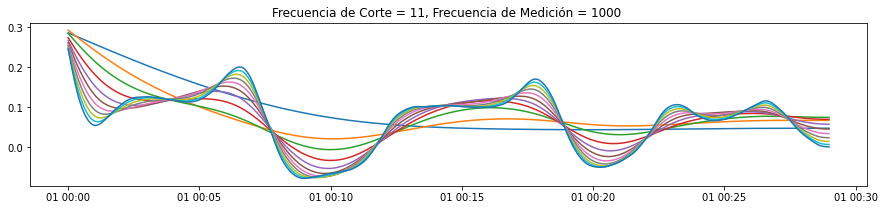

In [115]:
plt.figure(figsize=(15,3))
for i in range(1,12,1):
    lowpassfilt(train, fc=i)    

# Keep looking at the evolution of the signal through higher levels of `fc`

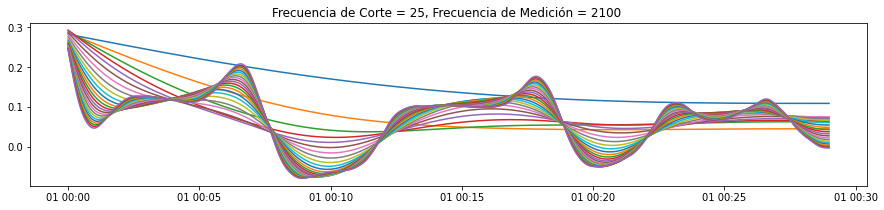

In [149]:
plt.figure(figsize=(15,3))
for i in range(1,26,1):
    lowpassfilt(train, fc=i,fm=2100)    

# These type of cuts are more noisy, with the same `fc`, but a low `fm`

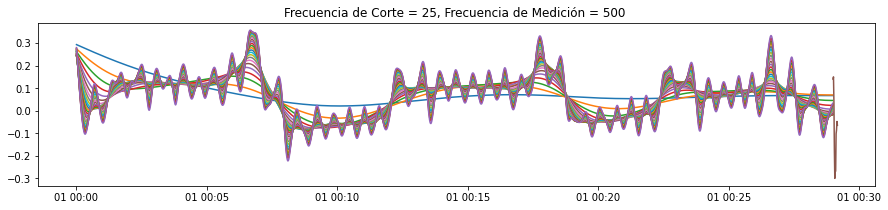

In [154]:
plt.figure(figsize=(15,3))
for i in range(1,26,1):
    lowpassfilt(train, fc=i,fm=500)    


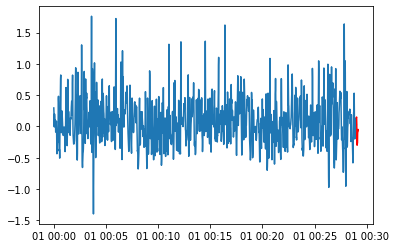

In [159]:
plt.plot(train)
plt.plot(test, c='r')